<a href="https://colab.research.google.com/github/SergJohn/Crypto-Prediction-2022-Project/blob/main/Exponential_Statistical_Model_To_Use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**SKTIME attempt**
Did not work for our data
---

In [1]:
pip install sktime

     |████████████████████████████████| 6.6 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 22.9 MB/s 
     |████████████████████████████████| 9.8 MB 32.9 MB/s 
     |████████████████████████████████| 34.5 MB 7.8 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [76]:
# imports necessary for this chapter
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

In [77]:
import pandas as pd
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [88]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000
1,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
3,2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
4,2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000


In [89]:
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [90]:
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Close
0,2014-10-16,382.556000
1,2014-10-17,383.757996
2,2014-10-18,391.441986
3,2014-10-19,389.545990
4,2014-10-20,382.845001


In [ ]:
# ????
# get data from dataset from July 2020
start_date = '2020-07-16'
end_date = '2022-03-31'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[mask] 

In [91]:
# Important step to make the model work - Set the Date column as Index
#df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)
df.index = pd.PeriodIndex(df.index, freq="D")
df.head()

,Close
Date,
2014-10-16,382.556000
2014-10-17,383.757996
2014-10-18,391.441986
2014-10-19,389.545990
2014-10-20,382.845001


In [162]:
train, test = temporal_train_test_split(df, test_size = 36)

In [163]:
from sktime.forecasting.base import ForecastingHorizon


In [170]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2022-03", periods=36, freq="D")), is_relative=False
)
fh

ForecastingHorizon(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
             '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
             '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
             '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
             '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
             '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
             '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
             '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
             '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05'],
            dtype='period[D]', is_relative=False)

In [171]:
fh = list(range(1,120))

In [188]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [189]:
simple_exp.fit(train)

ExponentialSmoothing()

In [190]:
pred = simple_exp.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd04bddb690>)

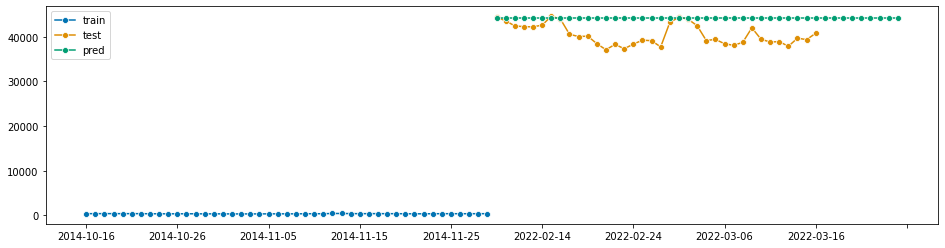

In [191]:
plot_series(train.iloc[:45], test.iloc[:45], pred.iloc[:45], labels = ["train", "test", "pred"])

---
**Model Giving good Stats - Use this one for the project**
Add comments and explanation texts, clean the code, perharps use another notebook for the end result model
---


In [276]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [277]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000
1,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
3,2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
4,2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000


In [278]:
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [279]:
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Close
0,2014-10-16,382.556000
1,2014-10-17,383.757996
2,2014-10-18,391.441986
3,2014-10-19,389.545990
4,2014-10-20,382.845001


In [280]:
HORIZON = 10

model = ExponentialSmoothing(endog = df['Close'])
results = model.fit()

preds = results.get_forecast(steps=HORIZON)

preds.summary_frame(alpha=0.2).head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
2709,40735.515542,792.797068,39719.505218,41751.525866
2710,40735.515542,1107.718777,39315.916809,42155.114274
2711,40735.515542,1351.130854,39003.971680,42467.059403
2712,40735.515542,1556.941965,38740.214129,42730.816954
2713,40735.515542,1738.557442,38507.464530,42963.566553


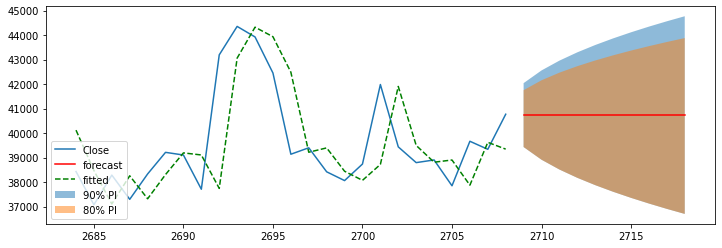

In [281]:
ax = df['Close'].iloc[-25:].plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax.fill_between(forecast_90.index, forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha=0.5, label='90% PI')
ax.fill_between(forecast_80.index, forecast_90['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha=0.5, label='80% PI')

forecast_80['mean'].iloc[-25:].plot(ax=ax, label='forecast', color='red')

results.fittedvalues.iloc[-25:].plot(ax=ax, label='fitted', color='green', linestyle='--')

ax.legend(loc=3)

Statistical model

In [282]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2709
Model:                   ETS(A, N, N)   Log Likelihood              -21928.016
Date:                Wed, 27 Apr 2022   AIC                          43862.033
Time:                        23:55:02   BIC                          43879.746
Sample:                             0   HQIC                         43868.437
                               - 2709   Scale                       628527.191
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9758      0.010    101.220      0.000       0.957       0.995
initial_level     382.5560   1.29e-14   2.97e+16      0.000     382.556     382.556
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             38625.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):            5070.11   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.15e+39. Standard errors may be unstable.
"""

In [283]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

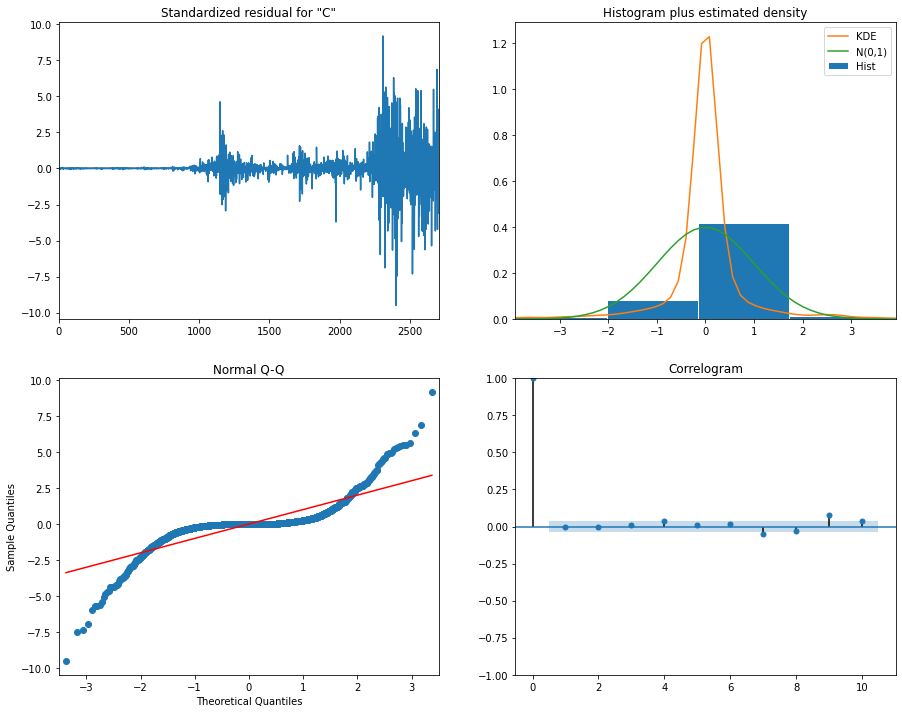

In [284]:
# Diagnosing the model residuals
results.plot_diagnostics(figsize = (15, 12))
plt.show()

In [285]:
# Divide into train and validation set to calculate R-squared score
train = df[:int(0.85 * (len(df)))]
test  = df[int(0.85 * (len(df))):]

train.shape, test.shape

((2302, 2), (407, 2))

In [286]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('Simple Exponential Smoothing Predictions')
print(predictions)

2302    35462.372015
2303    37423.518784
2304    36938.088884
2305    38115.156556
2306    39238.197737
            ...     
2704    38811.941130
2705    38901.786548
2706    37875.091864
2707    39623.452840
2708    39345.665033
Name: Simple Exponential Smoothing Predictions, Length: 407, dtype: float64


In [287]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

# Display the results
evaluation_results

,r2_score
0,0.958611
